# Clusterização
Em *Machine Learning* temos diversos algoritmos que nos possibilitam agrupar dados em função de suas características e propriedades. Para tal, temos diversos algoritmos à disposição, como:

* Density-based.
* Distribution-based.
* Centroid-based.
* Hierarchical-based.
* K-means clustering algorithm.
* DBSCAN clustering algorithm.
* Gaussian Mixture Model algorithm.
* BIRCH algorithm.

A clusterização (*Clustering*) é uma tarefa de Machine Learning não-supervisionada. Quando se usa um algoritmo de clusterização, significa que passamos para o algoritmo diversos dados de entrada (input) e deixamos o algoritmo agrupar os dados de acordo com as propriedades desse algoritmo. Esses grupos são chamados de clusters; e esses clusters são grupos de dados que são similares entre si, e esta similaridades é baseada nas relações dos pontos vizinhos. A clusterização é usada frequentemente para descoberta de padrões, a chamada ***Pattern Recognition***. A clusterização também pode ser usada no início de um trabalho de investigação e pesquisa para que se consiga alguns insights.

### Qual a diferença entre classificação e clusterização?

![](https://awari.com.br/wp-content/uploads/2022/12/Qual-a-diferenca-entre-classificacao-e-clusterizacao-1024x310.png)

Tanto **Classificação** quanto **Clusterização** consistem em métodos de identificação de padrões usados em **Machine Learning**. 

Contudo, embora ambas essas técnicas tenham lá suas semelhanças, a maior diferença entre elas reside no fato de que a classificação utiliza **classes pré-definidas** nas quais os objetos são atribuídos. 

Enquanto isso, o clustering identifica **semelhanças entre objetos**, agrupando-os de acordo com essas características em comum e que os diferenciam de outros grupos de objetos (clusters)

O clustering é utilizado para encontrar aspectos comuns entre determinados conjuntos de dados, sendo muito adotado por empresas para identificar aspectos comuns entre clientes e segmentá-los. 

Já a Classificação, por outro lado, pertence ao aprendizado supervisionado, o que significa que conhecemos os dados de entrada (rotulados neste caso) e conhecemos a possível saída do algoritmo. Além disso, esse método costuma ser mais usado em campos como biologia e na detecção de spam em e-mails.

### K-Means

K-Means é um algoritmo de clusterização (ou agrupamento) disponível na biblioteca Scikit-Learn.

É um algoritmo de aprendizado não supervisionado (ou seja, que não precisa de inputs de confirmação externos) que avalia e clusteriza os dados de acordo com suas características, como por exemplo:

* lojas/centro logistico
* clientes/produtos ou serviços semelhantes
* clientes/características semelhantes
* séries/gênero da série ou faixa etaria
* usuarios de uma rede social/usuario influenciador
* paciente/sintoma ou característica semelhante

Por exemplo, se eu tenho uma rede de lojas com abrangência nacional, qual seria os melhores lugares para construir os centros logísticos de abastecimento?

Podemos começar a responder isso com K-means.

**Como funciona?**
1. Primeiro, preciso definir um ‘K’, ou seja, um número de clusters (ou agrupamentos).
2. Depois, preciso definir, aleatoriamente, um centroide para cada cluster.
3. O próximo passo é calcular, para cada ponto, o centroide de menor distância. Cada ponto pertencerá ao centroide mais próximo (lembrar do exemplo do CD logístico e das lojas: cada loja (ponto) deve ser atendida pelo CD (centróide) mais próximo)
4. Agora, devo reposicionar o centróide. A nova posição do centroide deve ser a média da posição de todos os pontos do cluster.
5. Os dois ultimos passos são repetidos, iterativamente, até obtermos a posição ideal dos centróides.

![](https://miro.medium.com/v2/resize:fit:640/1*AzX-3FPncrZaIfWbI5EwCw.gif)

# Mãos à obra

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

Vamos ao exemplo: a rede de lojas Tabajara tem 19 lojas em algumas das principais cidades do país. A empresa pensa em construir 3 centros logísticos para abastecer as lojas. Mas, qual seria a posição ótima para cada um desses três hubs, considerando apenas a posição (coordenadas geográficas) das lojas?

Abaixo, plotamos no gráfico a representação em coordenadas de cada uma das 19 cidades onde a rede possui filiais.


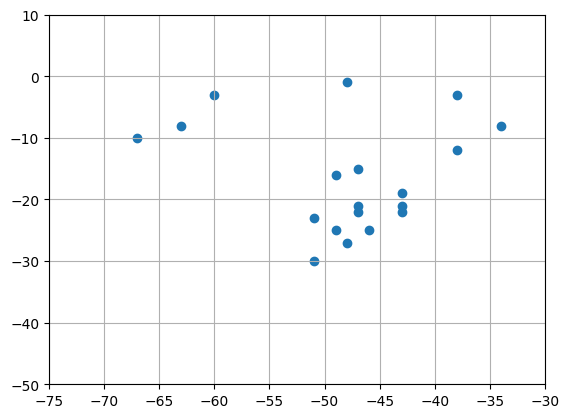

In [2]:
dataset = np.array(
#matriz com as coordenadas geográficas de cada loja
[[-25, -46], #são paulo
[-22, -43], #rio de janeiro
[-25, -49], #curitiba
[-30, -51], #porto alegre
[-19, -43], #belo horizonte
[-15, -47], #brasilia
[-12, -38], #salvador
[-8, -34], #recife
[-16, -49], #goiania
[-3, -60], #manaus
[-22, -47], #campinas
[-3, -38], #fortaleza
[-21, -47], #ribeirão preto
[-23, -51], #maringa
[-27, -48], #florianópolis
[-21, -43], #juiz de fora
[-1, -48], #belém
[-10, -67], #rio branco
[-8, -63] #porto velho
])
plt.scatter(dataset[:,1], dataset[:,0]) #posicionamento dos eixos x e y
plt.xlim(-75, -30) #range do eixo x
plt.ylim(-50, 10) #range do eixo y
plt.grid() #função que desenha a grade no nosso gráfico

O ponto mais ao sul no gráfico representa Porto Alegre, o ponto mais à Oeste representa Rio Branco, o ponto mais à leste representa Recife e o ponto mais ao norte representa Belém.

Vamos utilizar o algoritmo KMeans, do pacote Scikit-Learn para agrupar (clusterisar) as nossas filiais em 3 grupos. Cada grupo será servido por um centro logístico, que será representado por um centróide (os pontos em vermelho no gráfico).

In [3]:
kmeans = KMeans(n_clusters = 3, #numero de clusters
    init = 'k-means++', n_init = 10, #algoritmo que define a posição dos clusters de maneira mais assertiva
    max_iter = 300) #numero máximo de iterações

pred_y = kmeans.fit_predict(dataset)


**O que sai da previsão?**

In [4]:
pred_y

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 2, 0, 1, 0, 0, 0, 0, 1, 2, 2],
      dtype=int32)

**Os centros dos cluster**

In [5]:
kmeans.cluster_centers_

array([[-22.16666667, -47.        ],
       [ -6.        , -39.5       ],
       [ -7.        , -63.33333333]])

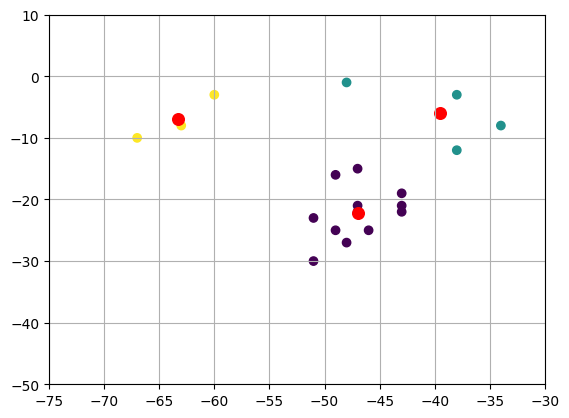

In [6]:
plt.scatter(dataset[:,1], dataset[:,0], c = pred_y) #posicionamento dos eixos x e y
plt.xlim(-75, -30) #range do eixo x
plt.ylim(-50, 10) #range do eixo y
plt.grid() #função que desenha a grade no nosso gráfico
plt.scatter(kmeans.cluster_centers_[:,1],kmeans.cluster_centers_[:,0], s = 70, c = 'red') #posição de cada centroide no gráfico
plt.show()

Nossa clusterização apontou as três posições para os nossos centros logísticos. Vamos ver onde, aproximadamende, eles ficariam?

* [-7, -63.33333333] — Humaitá/AM
* [-6, -39.5] — Acopiara/CE
* [-22.16666667, -47] — Mogi Guaçu/SP


### **Vamos ver no mapa?**

In [7]:
import folium

#Criano nosso mapa do Brasil
mapa_brasil = folium.Map(location=[-15.761,-49.954], width=900,height=800,zoom_start=5)

# adicionando as localidades das lojas
for local in dataset:
    folium.Marker(local,color='#3186cc',
                tooltip=str(local)).add_to(mapa_brasil)

# adicionando os centros logísticos identificados pelo nosso modelo de clusterização K-Means
for centro_logistico in kmeans.cluster_centers_:
    folium.Marker(centro_logistico, icon=folium.Icon(color='orange',),
                tooltip='CL: ' + str(centro_logistico)).add_to(mapa_brasil)

mapa_brasil

## Melhorando um pouco o exemplo
Neste segundo cenário, vamos considerar que em algumas das maiores cidades nós temos mais que uma loja.

Só em São Paulo, agora temos 21 lojas. No total, nossa rede teria 86 lojas.

In [8]:
novo_dataset = np.array(
#matriz com as coordenadas geográficas de cada loja
[
[-25, -46], #são paulo
[-25, -46], #são paulo
[-25, -46], #são paulo
[-25, -46], #são paulo
[-25, -46], #são paulo
[-25, -46], #são paulo
[-25, -46], #são paulo
[-25, -46], #são paulo
[-25, -46], #são paulo
[-25, -46], #são paulo
[-25, -46], #são paulo
[-25, -46], #são paulo
[-25, -46], #são paulo
[-25, -46], #são paulo
[-25, -46], #são paulo
[-25, -46], #são paulo
[-25, -46], #são paulo
[-25, -46], #são paulo
[-25, -46], #são paulo
[-25, -46], #são paulo
[-25, -46], #são paulo
[-22, -43], #rio de janeiro
[-22, -43], #rio de janeiro
[-22, -43], #rio de janeiro
[-22, -43], #rio de janeiro
[-22, -43], #rio de janeiro
[-22, -43], #rio de janeiro
[-22, -43], #rio de janeiro
[-22, -43], #rio de janeiro
[-22, -43], #rio de janeiro
[-22, -43], #rio de janeiro
[-22, -43], #rio de janeiro
[-22, -43], #rio de janeiro
[-25, -49], #curitiba
[-25, -49], #curitiba
[-25, -49], #curitiba
[-25, -49], #curitiba
[-25, -49], #curitiba
[-25, -49], #curitiba
[-30, -51], #porto alegre
[-30, -51], #porto alegre
[-30, -51], #porto alegre
[-19, -43], #belo horizonte
[-19, -43], #belo horizonte
[-19, -43], #belo horizonte
[-19, -43], #belo horizonte
[-19, -43], #belo horizonte
[-19, -43], #belo horizonte
[-19, -43], #belo horizonte
[-19, -43], #belo horizonte
[-15, -47], #brasilia
[-15, -47], #brasilia
[-15, -47], #brasilia
[-15, -47], #brasilia
[-15, -47], #brasilia
[-15, -47], #brasilia
[-12, -38], #salvador
[-12, -38], #salvador
[-12, -38], #salvador
[-8, -34], #recife
[-8, -34], #recife
[-8, -34], #recife
[-16, -49], #goiania
[-16, -49], #goiania
[-3, -60], #manaus
[-3, -60], #manaus
[-3, -60], #manaus
[-3, -60], #manaus
[-22, -47], #campinas
[-22, -47], #campinas
[-3, -38], #fortaleza
[-3, -38], #fortaleza
[-3, -38], #fortaleza
[-3, -38], #fortaleza
[-3, -38], #fortaleza
[-3, -38], #fortaleza
[-21, -47], #ribeirão preto
[-23, -51], #maringa
[-27, -48], #florianópolis
[-27, -48], #florianópolis
[-21, -43], #juiz de fora
[-1, -48], #belém
[-1, -48], #belém
[-1, -48], #belém
[-1, -48], #belém
[-10, -67], #rio branco
[-8, -63] #porto velho
])

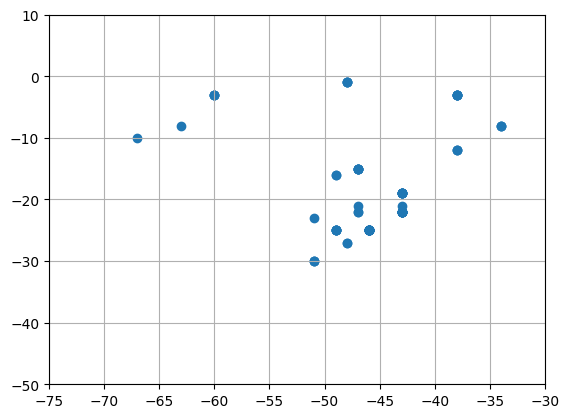

In [9]:
plt.scatter(novo_dataset[:,1], novo_dataset[:,0]) #posicionamento dos eixos x e y
plt.xlim(-75, -30) #range do eixo x
plt.ylim(-50, 10) #range do eixo y
plt.grid() #função que desenha a grade no nosso gráfico

In [10]:
novo_kmeans = KMeans(n_clusters = 3, #numero de clusters
    init = 'k-means++', n_init = 10, #algoritmo que define a posição dos clusters de maneira mais assertiva
    max_iter = 300) #numero máximo de iterações

novo_pred_y = novo_kmeans.fit_predict(novo_dataset)

**Os centros dos cluster**

In [11]:
novo_kmeans.cluster_centers_

array([[-22.55384615, -45.90769231],
       [ -5.125     , -39.75      ],
       [ -5.        , -61.66666667]])

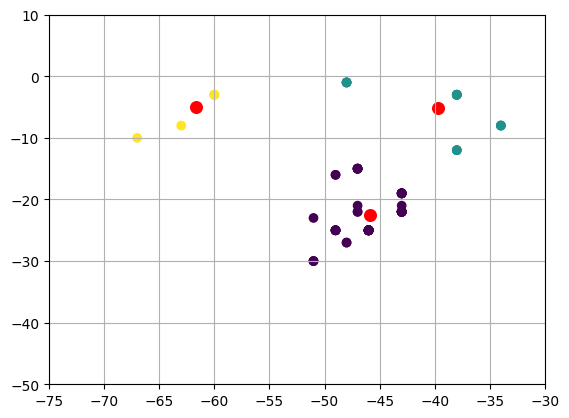

In [12]:
plt.scatter(novo_dataset[:,1], novo_dataset[:,0], c = novo_pred_y) #posicionamento dos eixos x e y
plt.xlim(-75, -30) #range do eixo x
plt.ylim(-50, 10) #range do eixo y
plt.grid() #função que desenha a grade no nosso gráfico
plt.scatter(novo_kmeans.cluster_centers_[:,1],novo_kmeans.cluster_centers_[:,0], s = 70, c = 'red') #posição de cada centroide no gráfico
plt.show()

Agora, nossos centros logísticos ficariam nos seguintes locais:

1. [-5, -61.66666667] — Beruri/AM
2. [-5.125, -39.75] — Boa Viagem/CE
3. [-22.55384615, -45.90769231] — Consolação/MG

In [13]:
import folium

#Criano nosso mapa do Brasil
mapa_brasil = folium.Map(location=[-15.761,-49.954], width=900,height=800,zoom_start=5)

# adicionando as localidades das lojas
for local in novo_dataset:
    folium.Marker(local,color='#3186cc',
                tooltip=str(local)).add_to(mapa_brasil)

# adicionando os centros logísticos identificados pelo nosso modelo de clusterização K-Means
for centro_logistico in novo_kmeans.cluster_centers_:
    folium.Marker(centro_logistico, icon=folium.Icon(color='orange',),
                tooltip='CL: ' + str(centro_logistico)).add_to(mapa_brasil)

mapa_brasil

---
fonte:
* https://invitedresearcher.com/clusterizacao-com-python-visualizacao-de-grupos/
* https://blog.betrybe.com/tecnologia/clusterizacao/ (sobre os algoritmos)
* https://datasans.medium.com/k-means-cluster-okay-you-built-the-model-then-what-no-math-a0e710b42252